<a href="https://colab.research.google.com/github/Mark42Zhong/Just-for-fun/blob/main/Bilateral_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(749, 790, 3)


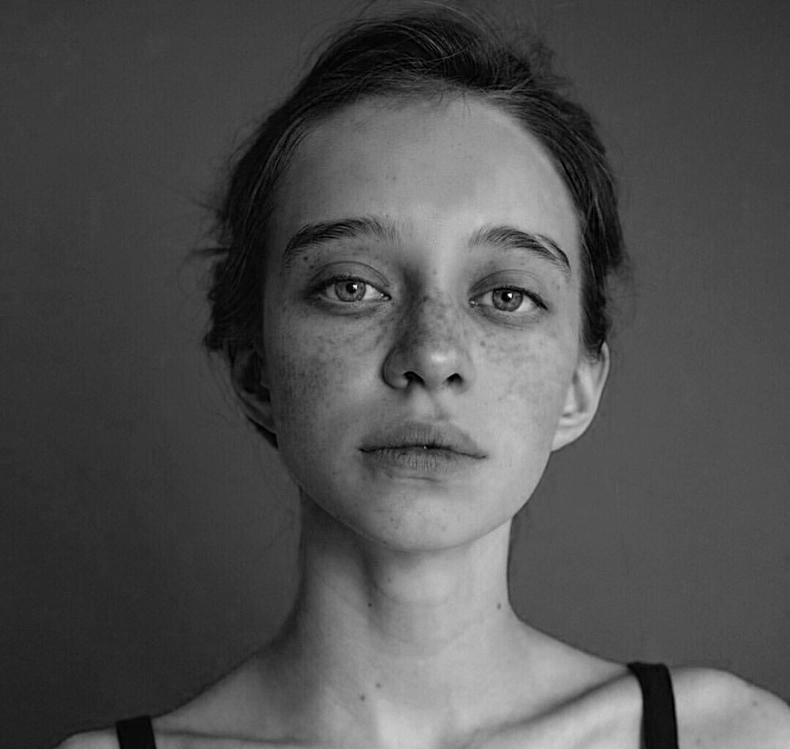

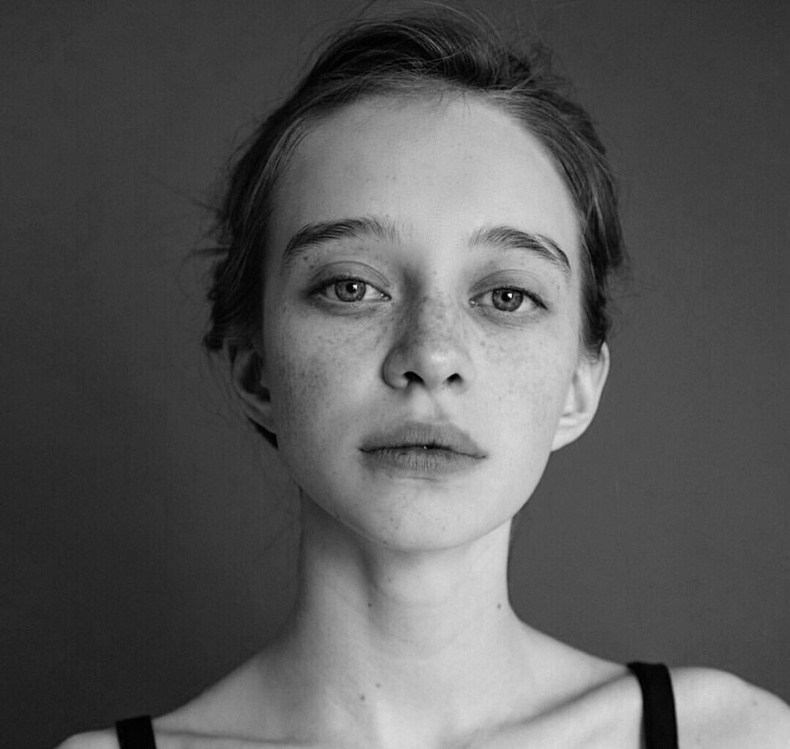

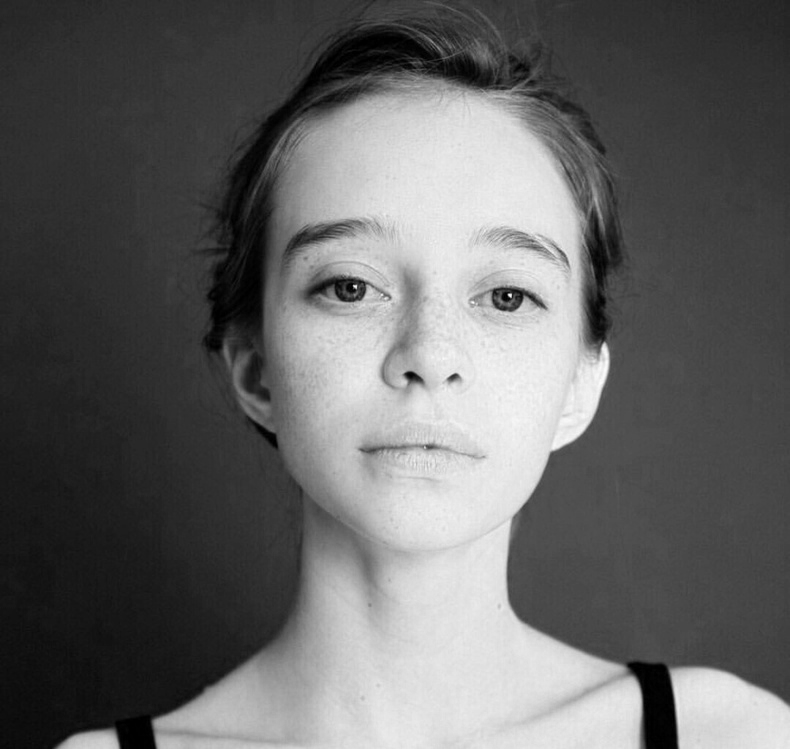

In [ ]:
print(src_img.shape)
rows = src_img.shape[0]
cols = src_img.shape[1]
channels = src_img.shape[2]

img = np.zeros((channels, rows, cols))
for channel in range(channels):
  for row in range(rows):
     for col in range(cols):
       img[channel][row][col] = src_img[row][col][channel]
cv2_imshow(img[0])
cv2_imshow(img[1])
cv2_imshow(img[2])

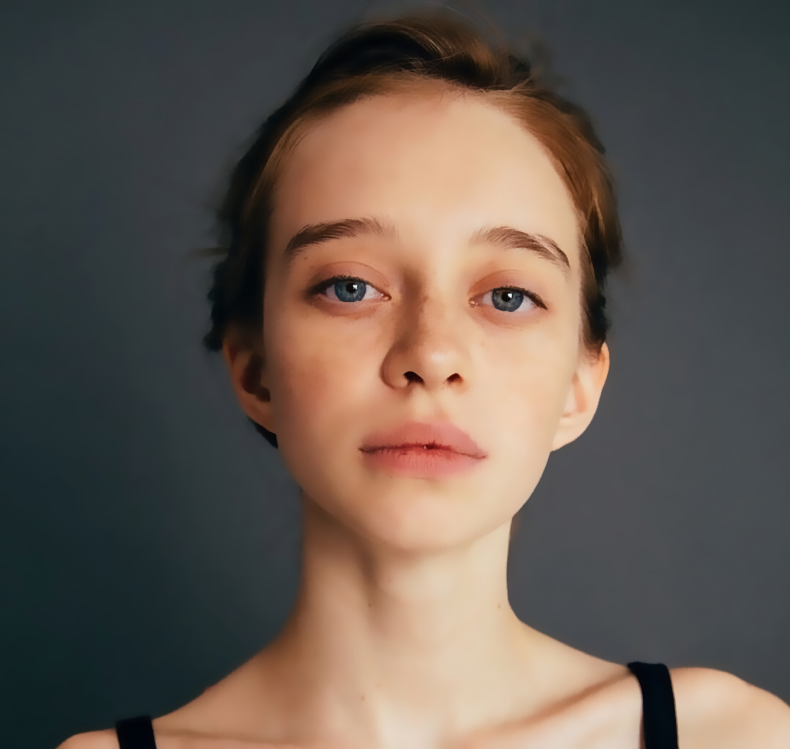

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

src_img = cv2.imread(r"/tmp/test_img/src_img.jpg")
dst_img = cv2.bilateralFilter(src_img, 15, 50, 50)
cv2_imshow(dst_img)
# cv2.imwrite("/tmp/test_img/dst_img.jpg", dst_img)

In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow

def RBG_split(src_img):
  blue, green, red = cv2.split(src_img)
  return blue, green, red

def spatial_distance_func(x1, y1, x2, y2, sigma_d):
  distance = np.power(x1-x2,2) + np.power(y1-y2, 2)
  # return 1.0 / (2.0 * np.pi * sigma_d * sigma_d) * np.exp(-1.0 * distance / (2.0 * sigma_d * sigma_d))
  return np.exp(-0.5 * distance / (sigma_d ** 2))

def pixel_difference_func(g1, g2, sigma_r):
  pixel_difference = np.power(g1-g2, 2)
  # return 1.0 / (2.0 * np.pi * sigma_r * sigma_r) * np.exp(-1.0 * pixel_difference / (2.0 * sigma_r * sigma_r))
  return np.exp(-0.5 * pixel_difference / (sigma_r ** 2))
  

def bilateral_filter_func(img, diameter, sigma_d, sigma_r):
  new_image = np.zeros(img.shape)

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      w_sum = 0
      filter_img = 0
      for k in range(diameter):
        for l in range(diameter):
          n_x =row - (diameter/2 - k)
          n_y =col - (diameter/2 - l)
          
          # if n_x >= len(img):
          #   n_x -= len(img)
          # if n_y >= len(img[0]):
          #   n_y -= len(img[0])
          n_x, n_y = int(n_x), int(n_y)

          #padding
          if n_x < 0 or n_x >= img.shape[0] or n_y < 0 or n_y >= img.shape[1]:
            w_sum += 0
            filter_img += 0
            continue

          d = spatial_distance_func(row, col, n_x, n_y, sigma_d)
          r = pixel_difference_func(img[row][col], img[n_x][n_y], sigma_r)
          w = d * r
          w_sum += w
          filter_img = filter_img + img[n_x][n_y] * w
      filter_img = filter_img // w_sum
      new_image[row][col] = np.round(filter_img).astype(np.int)
  return new_image

def main():
  src_img = cv2.imread(r"/tmp/test_img/src_img.jpg")
  # src_img = src_img / 255.0
  blue, green, red = RBG_split(src_img)
  imgs = [blue, green, red]

  parameters_1 = [3, 5, 7, 9]
  parameters_2 = [10, 20, 30, 40, 50, 60]
  parameters_3 = [10, 20, 30, 40, 50, 60]

  dst_imgs = []
  for i in parameters_1:
    for j in parameters_2:
      for k in parameters_3:
        for img in imgs:
          dst_img = bilateral_filter_func(img, i, j, k)
          dst_imgs.append(dst_img)

        dst_img = cv2.merge(dst_imgs)
        dst_imgs.clear()
        cv2.imwrite("/tmp/test_img/{0}-{1}-{2}.jpg".format(i, j, k), dst_img)

if __name__ == "__main__":
  main()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
